In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


# Introduction

Reference: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression

<b>Source:</b>

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

<b>Demographic:</b>

• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

<b>Behavioral </b>

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

<b>Medical( history) </b>

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

<b>Medical(current) </b>

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

<b>Predict variable (desired target) </b>

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

---------------


# Downloading and pre-processing the data

In [2]:
#y value = TenYearCHD ->  10 year risk of coronary heart disease (binary: “1”, means “Yes”, “0” means “No”)

data = pd.read_csv('framingham_null.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


We must then split the data into inputs and outputs. check how many null rows are present

In [3]:
#use describe function for an overview of the data 
data.describe

<bound method NDFrame.describe of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0      

In [4]:
#check how many rows contain nulls
null_mask = data.isnull().any(axis=1)
null_rows = data[null_mask]
print(null_rows)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
14       0   39        2.0              1         9.0     0.0   
21       0   43        1.0              0         0.0     0.0   
26       0   60        1.0              0         0.0     0.0   
33       1   61        NaN              1         5.0     0.0   
36       1   56        NaN              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4208     0   51        1.0              1         9.0     0.0   
4229     0   51        3.0              1        20.0     0.0   
4230     0   56        1.0              1         3.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
14                  0             0         0    226.0  114.0   64.0  22.35   
21                  0             0         0    185.0  123.5

In [5]:
#there are 582 rows with nulls

In [6]:
#drop all rows containing null
data_clean=data.dropna()

In [7]:
#check whether variables are statistically significant
# we dont want to include variables which are not statistically significant
import pandas as pd
import statsmodels.api as sm

#df.head()
df_logit=data_clean
Cols = df_logit.columns 
X = df_logit[Cols[:-1]] 
y = df_logit[Cols[-1]]  
model = sm.Logit(y,X).fit() 
model.summary()


Optimization terminated successfully.
         Current function value: 0.396642
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3641
Method:                           MLE   Df Model:                           14
Date:                Fri, 08 Aug 2025   Pseudo R-squ.:                 0.07059
Time:                        10:52:45   Log-Likelihood:                -1450.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 3.854e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4018      0.105      3.836      0.000       0.197       0.607
age                 0.0289      0.006      4.939      0.000       0.017       0.040
education          -0.1966      0.048     -4.087      0.000      -0.291      -0.102
currentSmoker      -0.2120      0.153     -1.386      0.166      -0.512       0.088
cigsPerDay          0.0206      0.006      3.327      0.001       0.008       0.033
BPMeds              0.3649      0.230      1.584      0.113      -0.087       0.816
prevalentStroke     0.7053      0.485      1.455      0.146      -0.245       1.655
prevalentHyp        0.9165      0.124      7.368      0.000       0.673       1.160
diabetes            0.7303      0.298      2.451      0.014       0.146       1.314
totChol            -0.0010      0.001     -0.934      0.351      -0.003       0.001
sysBP               0.0127      0.004      3.343      0.001       0.005       0.020
diaBP              -0.0259      0.006     -4.219      0.000      -0.038      -0.014
BMI                -0.0484      0.012     -3.932      0.000      -0.072      -0.024
heartRate          -0.0224      0.004     -5.645      0.000      -0.030      -0.015
glucose             0.0020      0.002      0.967      0.334      -0.002       0.006
===================================================================================
"""

Analysis of statistical significance of predictors

z-score of coeficients: A larger |z-score| (further from zero) suggests a stronger association between the predictor and the outcome

p>|z|:  probability of achieving that z score by random chance

2 predictors (glucose, and totChol) have 0.334 and 0.351 prob of >z

glucose, and totChol also have a lower z value 0.967/0.934 - compared to other predictors - 

However, I choose to remove <b>ONLY</b> glucose variable, since based on available documentation and expert knowledge of Cadivascular Disease, Total Cholesterol is understood to be a contributor (even though it is not a perfect predictor)
 



In [8]:
#do not include glucose in the inputs
#select column titles 
outputs = ['TenYearCHD']
inputs = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke','diabetes','sysBP','diaBP','BMI','heartRate','totChol']


#set X as the inputs
#set Y as the output 
X = data_clean[inputs]
Y = data_clean[outputs].to_numpy().reshape(-1)

scale the data

In [9]:
#scale the data 
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [10]:
print(X)

[[ 1.11982472 -1.23335117  1.97575158 ...  0.29168785  0.35633992
  -0.94971428]
 [-0.8929969  -0.41559058  0.01979497 ...  0.7246142   1.60828949
   0.29772868]
 [ 1.11982472 -0.1819447  -0.95818334 ... -0.10926099 -0.06097661
   0.18432477]
 ...
 [ 1.11982472  0.05170118 -0.95818334 ...  0.04570696 -0.81214636
   1.72661789]
 [ 1.11982472  0.16852412  0.99777327 ... -1.49413337 -0.89560966
  -0.67754491]
 [-0.8929969   0.28534706  0.01979497 ... -1.06120701  0.35633992
   0.72866352]]


In [11]:
#divide it into a 80 / 20 training and testing split.
num_of_points = len(Y)

idx = list(range(num_of_points))
np.random.shuffle(idx)
idx_train = idx[:int(num_of_points * 0.8)]
idx_train.sort()
idx_test = idx[int(num_of_points * 0.8):]
idx_test.sort()

X_train = X[idx_train, :]
X_test = X[idx_test, :]

Y_train = Y[idx_train]
Y_test = Y[idx_test]

# Logistic Regression
<i>Reference: Module13 Imperial AI Certificate course</i>


Assume we have a set of predictors $x \in \mathcal{X}$, and a set of outputs $y \in \{0, 1 \}$. We are then interested in estimating the probability of belonging to a certain class, that is, we want to build an estimator, $\hat{p}(x)$, such that:
$$
\hat{p}(x) = \mathbb{P}( Y = 1 | X = x )
$$

There are many real-world scenarios where this might be the case. Consider for example, we might be interested in predicting if a particular individual infected with COVID will need hospital treatment. In this case, we would define $Y = 1$ the scenario where the individual requires treatment, and $Y = 0$ otherwise. For predictors we could use $X = $ age. 

We could decide to use linear regression, that is, a model of the form:
$$
\hat{p}(x) = \beta_0 + x \beta_1
$$

However, we run into trouble. Probabilities must lie between 0 and 1! The linear model is unable to incorporate this property into its predictions!

We can instead wrap our linear model in a function that guarantees all our outputs lie between 0 and 1. We will be using the sigmoid function, defined as:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

After wrapping the linear model, we obtain the logistic regression model, given by:
$$
\hat{p}(x) = \sigma(\beta_0 + x \beta_1)
$$

Which we can write as:
$$
\hat{p}(x) = \frac{e^{\beta_0 + x \beta_1}}{1 + e^{\beta_0 + x \beta_1}}
$$

# Training the function
<i>Reference: Module13 Imperial AI Certificate course</i>

The parameters of a linear regression model can be estimated using least squares. However, it is not the best optimiser for logistic regression. This is because we are not estimating $Y$ directly, instead we are estimating $\textit{the probability}$ of Y. This means maximum likelihood estimation is much more appropriate for logistic regression. We can write the likelihood function easily:
$$
\mathcal{L} = \prod_{i : y_i = 1} \mathbb{P}(Y = 1 | X = x_i) \prod_{i' : y_{i'} = 0} (1 - \mathbb{P}(Y = 0 | X = x_{i'}))
$$

Instead of maximising this directly, it is more common to minimise the negative log-likelihood:
$$
\ell(\beta) = - \log \mathcal{L}(\beta) = - \sum_{i : y_i = 1} \log\sigma(x_i^T \beta) - \sum_{i' : y_{i'} = 0}\log \sigma(x_{i'}^T\beta)
$$
So that we choose our parameters, $\hat{\beta}$:
$$
\hat{\beta} = \arg\min_{\beta} \ell(\beta)
$$

Finding the minimum can easily be done using any gradient-based optimiser. In addition, we can also add regularization, which helps us avoid overfitting. We will begin by investigating this.

We use scikit.learn's LogisticRegression class to train a model on the data-set above, without  regularizing 
Show the model's training and test accuracy, and build a confusion matrix for each set. (
Use functions  $ \texttt{.fit()} $, $\texttt{.predict()}$, and $\texttt{confusion\_matrix()}$.

In [12]:
# define the model - pass Penalty = None to disable Regularisation
model = LogisticRegression(penalty = None)
# train the model
model.fit(X_train, Y_train)
# create the predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
# build the confusion matrices
confusion_matrix_train = confusion_matrix(Y_train, Y_train_pred)
confusion_matrix_test = confusion_matrix(Y_test, Y_test_pred)
# calculate accuracies
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
# display the results
print('Training Confusion Matrix')
print(confusion_matrix_train)
print()
print(f'Training accuracy = {train_accuracy}')
print()
print('Testing Confusion Matrix')
print(confusion_matrix_test)
print()
print(f'Testing accuracy = {test_accuracy}')

Training Confusion Matrix
[[2452   20]
 [ 419   33]]

Training accuracy = 0.8498632010943913

Testing Confusion Matrix
[[620   7]
 [ 97   8]]

Testing accuracy = 0.8579234972677595


## REgularisation
<i>Reference: Module13 Imperial AI Certificate course</i>

We add a penalty to the loss function to decrease the complexity of the model, in an attempt to stop the model from over-fitting. Ideally, this should lead to better generalization. To be more precise, for L2 regularization we will now choose our parameters by minimizing the modified loss function:
$$
\hat{\beta} = \arg\min_\beta \{ C \cdot \ell(\beta) + \frac{1}{2}\beta^T \beta \}
$$

Note that the new penalization means that $\beta$ should be closer to zero (this is what we mean by 'a simpler model').

We investigate the effect of L2 regularization. In particular, focus on the how the testing accuracy changes for different values of $C$. Create a plot that shows how $C$ varies, starting at $10^{-6}$ and ending at $10^{-2}$.

choose the best regularization constant. 



Best test accuracy was achieved with C = 0.002522311557788945, giving an accuracy of 0.8593.
Without regularisation, we achieved an accuracy of 0.8579.



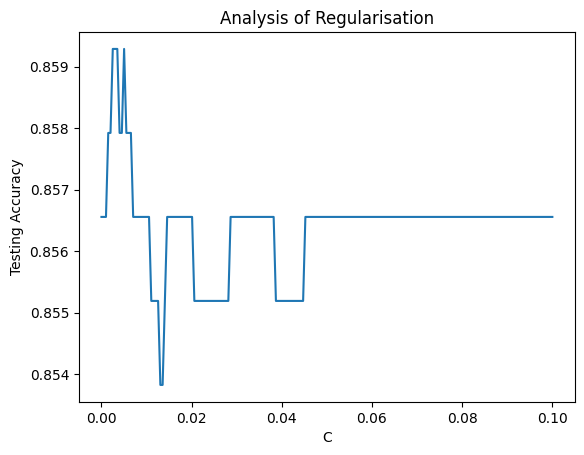

In [23]:
C_space = np.linspace(10e-6, 10e-2, 200)
#print(len(C_space))
accuracies = []

for C in C_space:
  model = LogisticRegression(penalty = 'l2', C = C)
  model.fit(X_train, Y_train)
  Y_test_pred = model.predict(X_test)
  accuracies.append(accuracy_score(Y_test, Y_test_pred))

plt.plot(C_space, accuracies)
plt.xlabel('C')
plt.ylabel('Testing Accuracy')
plt.title('Analysis of Regularisation')

best_model = np.argmax(accuracies)
best_accuracy = accuracies[best_model]
best_C = C_space[best_model]

print(f'Best test accuracy was achieved with C = {best_C}, giving an accuracy of {round(best_accuracy,4)}.') 
print(f'Without regularisation, we achieved an accuracy of {round(test_accuracy,4)}.')
print()


<b> Probability Threshold </b>

<i>Reference: Module13 Imperial AI Certificate course</i>

Recall that we are not estimating $Y$ directly, but instead the probability of $Y = 1 | X$. So far, our classification has been based on the which class has the higher probability. In other words, we have been using the classifier:
$$
  \hat{Y}(x) =
    \begin{cases}
      0 & \text{if } \hat{p}(x) < 0.5 \\
      1 & \text{if } \hat{p}(x) \geq 0.5 \\
    \end{cases}       
$$

However, we must also consider that the probability threshold of 0.5 might not be optimal. Indeed, consider our current data-set. Let's say we were going to use our model to decide who should go see a doctor and possibly get preventive treatment. 

<b>In this case, incorrectly predicting that someone will not have HEart Disease, when they will, is very costly - the person might face severe health consequences. On the other hand, incorrectly saying someone will have HEart Disease , when they won't, is not as bad because the doctor would be able to catch this, and we would just waste a little time. </b>


Steps

1. Train a new logistic regression model, using the best regularization 

2. Build a new function which takes as inputs: your Logistic Regression model, a set of $X$ values in which to predict, and a probability threshold $T$. 

3. Investigate the effect of the probability threshold on the number of False Negatives and False Positives. 

-> As per graph below I  choose Probability threshold of 0.16
-> False Negatives should be as small as possible since missing a Heart Disease patients is serious. higher false positives is less serious - although we still want it to be small - it's impact is some wasted time from doctor. 


101
t     fnr     fpr
0.12   0.181   0.5566
t     fnr     fpr
0.13   0.219   0.4737
t     fnr     fpr
0.14   0.2381   0.4115
t     fnr     fpr
0.15   0.2762   0.3525
t     fnr     fpr
0.16   0.3333   0.3014
t     fnr     fpr
0.17   0.3714   0.2568
t     fnr     fpr
0.18   0.4476   0.2105
t     fnr     fpr
0.19   0.5048   0.1802


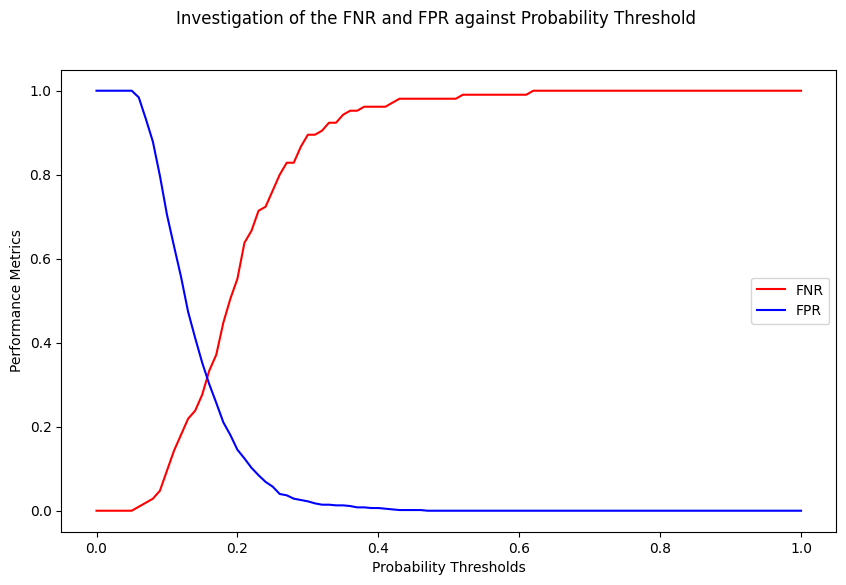

In [21]:
# define and train model
model = LogisticRegression(penalty = 'l2', C = best_C)
model.fit(X_train, Y_train)# model is trained on the Training dataset.

def predict_with_threshold(model, X, threshold):
  # calculate the probabilites
  probabilites = model.predict_proba(X)
  # scikit returns the probabilities for each class. However, we only need the second column as there are only two classes
  # and probabilites add up to one. In particular, the second column represents Pr(Y = 1 | X)
  probabilites = probabilites[:, 1]
  # build an array of boolean variables, checking where our probabilities are larger or equal to the threshold
  boolean_threshold = (probabilites >= threshold)
  # since our class labels are 1 and 0, we can simply transform the boolean variables by making them integers
  predictions = boolean_threshold.astype(int)

  return predictions

# define threshold space, initialise lists
thresholds = np.linspace(0, 1, 101)
print( len(thresholds) )
false_negatives = []
false_positives = []

# calculate number of true positives and negatives
num_of_positives = np.sum(Y_test)
num_of_negatives = len(Y_test) - num_of_positives

for t in thresholds:
  # predict
  Y_pred = predict_with_threshold(model, X_test, t)
  #calculate predictions
  #cm = confusion_matrix(Y_test, Y_pred)
  tn, fp, fn, tp  = confusion_matrix(Y_test, Y_pred).ravel()
  # calculate false negative rate and false positive rate
  #fnr = cm[1, 0] / num_of_positives
  #fpr = cm[0, 1] / num_of_negatives
  fnr = fn / num_of_positives
  fpr = fp / num_of_negatives
    
  
  if t > 0.11 and t < 0.2:    
      print ("t     fnr     fpr")
      print (t, " ", round(fnr,4) , " ", round(fpr,4))
    
  # append to lists
  false_negatives.append(fnr)
  false_positives.append(fpr)
    

# create a plot to see how the rates change with the threshold
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(10)
fig.suptitle('Investigation of the FNR and FPR against Probability Threshold')

ax.plot(thresholds, false_negatives, 'r', label = 'FNR')
ax.plot(thresholds, false_positives, 'b', label = 'FPR')
ax.set_ylabel('Performance Metrics')
ax.set_xlabel('Probability Thresholds')
ax.legend()

In [22]:
#based on the above graph a probability threshold of 0.16 is chosen which provide a balance between FNR and FPR

In [37]:
  Y_test_pred = predict_with_threshold(model, X_test, 0.16) #c=best_C as above
  #calculate predictions
  #cm = confusion_matrix(Y_test, Y_pred)
  cm=confusion_matrix(Y_test, Y_test_pred)


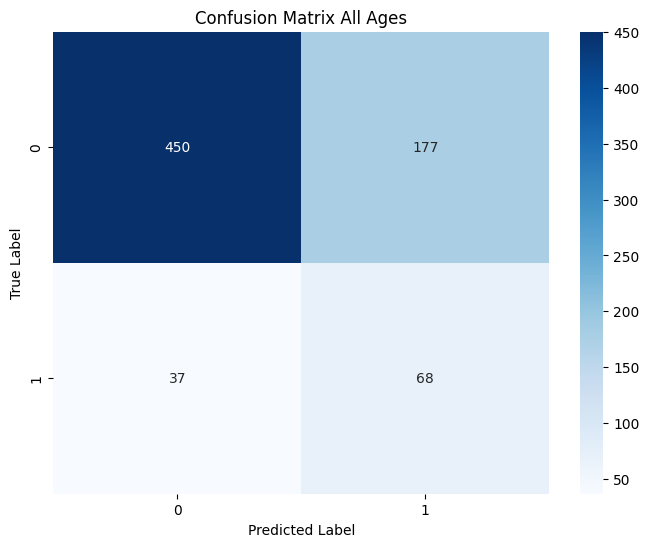

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix All Ages')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
tn, fp, fn, tp =confusion_matrix(Y_test, Y_test_pred).ravel()
print(" tn, fp, fn, tp")
print( tn," ",fp, " ",fn, " ",tp)


 tn, fp, fn, tp
450   177   37   68


In [39]:
sensitivity= tp/(tp+fn)
specificity= tn/(fp+tn)
accuracy=accuracy_score(Y_test, Y_test_pred)
print("sensitivity: ", round(sensitivity,4))
print("specificity: ", round( specificity,4))
print( "accuracy : ", round(accuracy,4))

sensitivity:  0.6476
specificity:  0.7177
accuracy :  0.7077
